# Weekly activity


# Setup

In [ ]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

# Exercise

1. Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:
```
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
# img is the source image
# num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
# line_color is the color of the grid line.
# The output of the function should be image with grids
```

In [ ]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):

    img_copy = img.copy()
    height, width = img_copy.shape[:2]
    num_horizontal_patches = num_horizontal_grid
    num_vertical_patches = num_vertical_grid
    color = line_color

    # M and N are basically number of pixels per patch
    M, N = int(height/num_horizontal_patches), int(width/num_vertical_patches)

    x1, y1 = 0, 0

    for y in range(0, height, M):
        for x in range(0, width, N):
    #         if (height - y) < M or (width - x) < N:
    #             break

            y1 = y + M    # lower right coordinate that will be used to construct rectangle
            x1 = x + N

            # Check whether patch lower right coordinate exceeds image height and width
            if x1 >= width and y1 >= height:
                x1 = width - 1
                y1 = height - 1
                tile = img_copy[y:height, x:width]
                cv.rectangle(img_copy, (x, y), (x1, y1), color, 1)
                cv.imshow('tile', tile)
            # When patch lower right y-coordinate exceeds patch height
            elif y1 >= height:
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), color, 1)

            # When patch lower right x-coordinate exceeds patch width
            elif x1 >= width:
                x1 = width - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), color, 1)

            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), color, 1)

    return img

2. Display image sequences of smooth transition of two images with different values of α. Refer to code in section "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.

In [ ]:
img1 = cv.imread('lena.jfif')
img2 = cv.imread('coins.jfif')

# Resize img2 to fit img1 dimensions
new_shape = img1.shape[:2]
img2 = cv.resize(img2, new_shape)

for alpha in range(5,100,5):
    dst = cv.addWeighted(img1, alpha/100, img2, 1-alpha/100, 0)
    title = ('Lena '+str(alpha)+'%, Coin '+str(100-alpha)+'%')
    cv.imshow(title, dst)

cv.waitKey(0)
cv.destroyAllWindows()

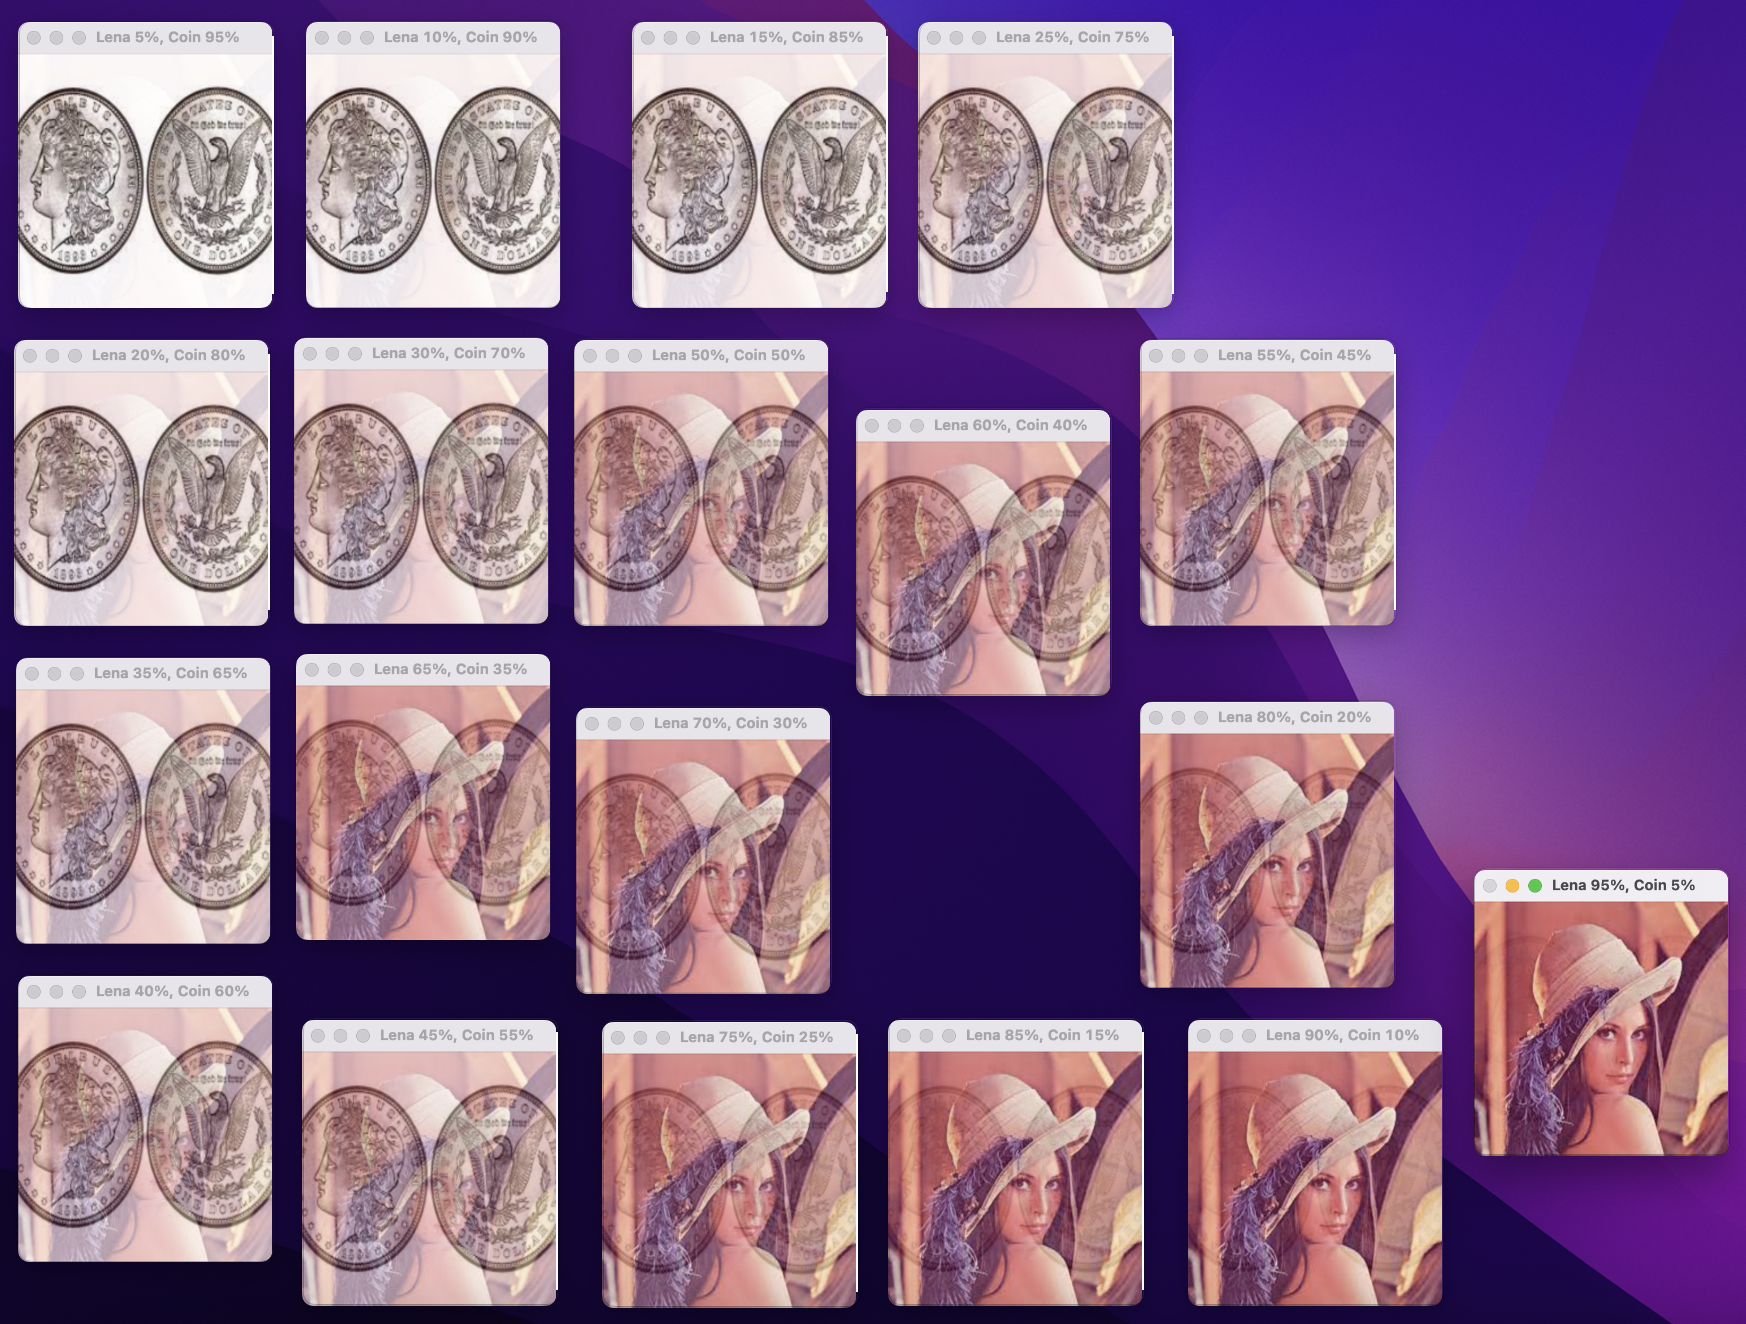

3. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
 - Use external libraries imutils.
 - Modify the transformation matrix.

In [ ]:
import imutils

img = cv.imread('lena.jfif')
img_rotate = imutils.rotate_bound(img, 45)

cv.imshow('rotated image', img_rotate)
cv.waitKey(0)
cv.destroyAllWindows()

4. Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:
 ![activity3](https://user-images.githubusercontent.com/70535150/179164088-35d7ee40-dba3-497a-98eb-98d19e229f4f.PNG)

In [ ]:
# Load two images
img1 = cv.imread('native-bee.png')
img2 = cv.imread('flower.jfif')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 80, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv.imshow('flower_bee',img1)
cv.waitKey(0)
cv.destroyAllWindows()